In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')

In [2]:
reg = pd.read_csv('./Regular_Season_Batter.csv')

In [3]:
reg.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [4]:
reg.info()
# float과 int와 object로 구성된 데이터 프레임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
batter_id          2454 non-null int64
batter_name        2454 non-null object
year               2454 non-null int64
team               2454 non-null object
avg                2428 non-null float64
G                  2454 non-null int64
AB                 2454 non-null int64
R                  2454 non-null int64
H                  2454 non-null int64
2B                 2454 non-null int64
3B                 2454 non-null int64
HR                 2454 non-null int64
TB                 2454 non-null int64
RBI                2454 non-null int64
SB                 2454 non-null int64
CS                 2454 non-null int64
BB                 2454 non-null int64
HBP                2454 non-null int64
SO                 2454 non-null int64
GDP                2454 non-null int64
SLG                2428 non-null float64
OBP                2430 non-null float64
E                  2454 non

### EDA ###

In [5]:
regular=reg[['batter_name', 'year', 'AB','position', 'OPS']] 
#여러개의 컬럼들을 뽑아내기 

In [6]:
regular
#필요한 컬럼들만 추출하여 객체 생성 
#차례대로 필요한부분을 생각해서 EDA진행

,batter_name,year,AB,position,OPS
0,가르시아,2018,183,내야수(우투우타),0.902
1,강경학,2011,1,내야수(우투좌타),0.000
2,강경학,2014,86,내야수(우투좌타),0.686
3,강경학,2015,311,내야수(우투좌타),0.673
4,강경학,2016,101,내야수(우투좌타),0.489
...,...,...,...,...,...
2449,황진수,2014,5,내야수(우투양타),0.000
2450,황진수,2015,2,내야수(우투양타),0.000
2451,황진수,2016,10,내야수(우투양타),0.000
2452,황진수,2017,117,내야수(우투양타),0.761


In [7]:
regular['batter_name'].nunique()
#중복된것을 제외한것 : nunique

345

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


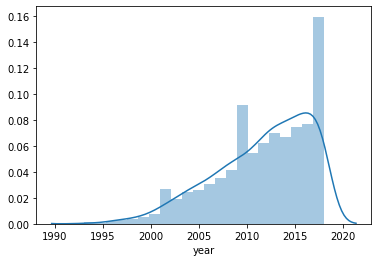

In [8]:
sns.distplot(regular['year'])
#연속형변수들의 분포를 쉽게 볼 수 있다 sns.distplot

In [9]:
regular['year'].describe()
#year의 요약통계를 보여준다

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

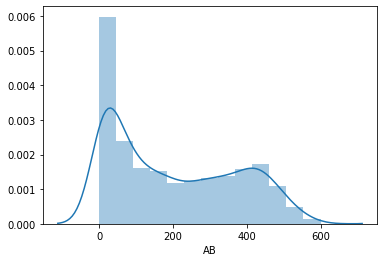

In [10]:
sns.distplot(regular['AB'])
#해석 : 100타석 미만의 선수의 분포가 많다

In [11]:
regular['AB'].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

In [12]:
regular['position'].value_counts()
#포지션은 범주형변수
#범주형변수를 보기 위해 가장 좋은것은 : value_counts()
#양타가 빈도수가 굉장히 작다는것을 알 수 있다

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

ValueError: cannot convert float NaN to integer

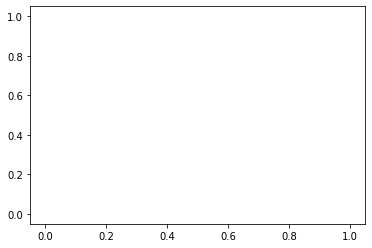

In [13]:
sns.distplot(regular['OPS'])
#na(결측지)가 존재하여 오류가 발생 

In [ ]:
sns.distplot(regular['OPS'].dropna())
#na값을 제거하고 분포를 보여줌 

In [ ]:
regular['OPS'].describe()

Text(0, 0.5, 'OPS')

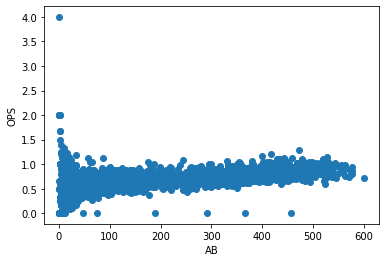

In [14]:
plt.scatter(regular['AB'],regular['OPS'])
#두개의 연속형변수들의 관계를 알기위해서 : plt.scatter()
plt.xlabel('AB')
plt.ylabel('OPS')

In [15]:
regular.groupby(['position'])['OPS'].describe()
#범주형변수와연속형변수의 통계적의미를 알고 싶을때 :groupby

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
내야수(우투양타),6.0,0.275000,0.331389,0.000,0.00000,0.1625,0.50425,0.761
내야수(우투우타),635.0,0.674866,0.284930,0.000,0.57250,0.7060,0.81600,4.000
내야수(우투좌타),139.0,0.642086,0.282960,0.000,0.55950,0.6890,0.77800,2.000
내야수(좌투좌타),36.0,0.748972,0.198233,0.000,0.64125,0.7955,0.88900,1.003
외야수(우투양타),7.0,0.697714,0.332075,0.000,0.65500,0.7980,0.89900,0.978
외야수(우투우타),229.0,0.665179,0.246583,0.000,0.55500,0.7230,0.82900,1.192
외야수(우투좌타),183.0,0.685956,0.268609,0.000,0.60150,0.7430,0.85350,1.200
외야수(좌투좌타),200.0,0.656005,0.202404,0.000,0.59300,0.7010,0.78100,1.000
포수(우투우타),185.0,0.613227,0.295676,0.000,0.49500,0.6400,0.75300,2.000


#데이터 잘라내기 #

In [16]:
reg
#조건에 따라 데이터 잘라내기 

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [17]:
reg.loc[reg['OPS']>0.9]
#ops가 0.9초과하는 행들만

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519000,0.383000,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902000
53,4,강민호,2015,롯데,0.311,123,380,63,118,18,...,14,0.639000,0.421000,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,1.060000
54,4,강민호,2016,롯데,0.323,116,381,65,123,26,...,7,0.549000,0.433000,4,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.982000
78,7,강봉규,2009,삼성,0.310,126,449,89,139,24,...,15,0.505568,0.406130,4,NaN,1978년 01월 12일,NaN,부천초-개성중-경남고-고려대-두산-삼성,NaN,0.911698
95,10,강정호,2012,넥센,0.314,124,436,77,137,32,...,16,0.559633,0.417154,12,NaN,1987년 04월 05일,NaN,화정초-무등중-광주제일고-(남부대)-현대-우리-히어로즈-넥센,NaN,0.976787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,334,호잉,2018,한화,0.306,142,529,85,162,47,...,5,0.573000,0.369000,4,190cm/92kg,1989년 05월 18일,외야수(우투좌타),미국 Fort Loramie(고)-미국 Toledo(대),300000달러,0.942000
2403,336,홍성흔,2009,롯데,0.371,119,426,71,158,33,...,15,0.532864,0.441667,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.974531
2404,336,홍성흔,2010,롯데,0.350,111,431,88,151,28,...,18,0.600928,0.430894,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,1.031822
2408,336,홍성흔,2014,두산,0.315,124,447,63,141,19,...,13,0.496644,0.405825,0,NaN,1977년 02월 28일,NaN,공릉초(강북리틀)-중앙중-중앙고-경희대-두산-롯데,NaN,0.902470


In [18]:
reg.loc[reg['batter_name']=='박석민']
#loc : df안에 원하는 데이터만 뽑아내기위해 사용 

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
797,115,박석민,2004,삼성,0.103,23,29,2,3,1,...,3,0.241,0.188,1,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.429
798,115,박석민,2005,삼성,0.198,52,81,7,16,3,...,3,0.259,0.283,3,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.542
799,115,박석민,2008,삼성,0.279,126,416,65,116,27,...,15,0.450,0.385,18,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.835
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002
801,115,박석민,2010,삼성,0.303,112,356,58,108,18,...,14,0.480,0.440,7,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.920
802,115,박석민,2011,삼성,0.278,128,457,74,127,24,...,13,0.442,0.374,13,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.816
803,115,박석민,2012,삼성,0.312,127,443,79,138,19,...,8,0.524,0.433,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.957
804,115,박석민,2013,삼성,0.318,117,396,61,126,24,...,13,0.515,0.425,10,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.940
805,115,박석민,2014,삼성,0.315,110,356,77,112,21,...,12,0.601,0.419,12,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.020
806,115,박석민,2015,삼성,0.321,135,448,90,144,25,...,13,0.551,0.441,14,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,0.992


In [19]:
reg.loc[reg['batter_name']=='박석민']["OPS"]
#박석민이라는 이름의 df에서 OPS만 뽑기

797    0.429
798    0.542
799    0.835
800    1.002
801    0.920
802    0.816
803    0.957
804    0.940
805    1.020
806    0.992
807    0.982
808    0.792
809    0.816
Name: OPS, dtype: float64

In [20]:
reg.loc[reg['batter_name']=='박석민'][['year','OPS']]
#df에서 여러개의 컬럼을 뽑고 싶을때 df[[]]

,year,OPS
797,2004,0.429
798,2005,0.542
799,2008,0.835
800,2009,1.002
801,2010,0.920
802,2011,0.816
803,2012,0.957
804,2013,0.940
805,2014,1.020
806,2015,0.992


In [21]:
reg.loc[reg['batter_name']=='박석민'][['year','OPS']].mean()

year    2011.692308
OPS        0.849462
dtype: float64

In [22]:
reg.loc[(reg['batter_name']=='박석민')& (reg['year']==2009)]
#& : and로 받아들인다 

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
800,115,박석민,2009,삼성,0.285,97,295,63,84,17,...,5,0.586,0.416,6,178cm/88kg,1985년 06월 22일,내야수(우투우타),율하초-경복중-대구고-삼성-상무-삼성,18000만원,1.002


# for문 #

In [23]:
for i in ['박석민', '채태인','최형우','박해민']:
    print(reg.loc[reg['batter_name']==i]['OPS'].mean())
#여러번의 코드사용을 줄여준다 

0.8494615384615384
0.7950833333333335
0.9003076923076923
0.7525999999999999


In [24]:
for i in [0,1,2,3]:
    print(reg['OPS'].iloc[i])

0.902
0.0
0.6859999999999999
0.6729999999999999


# Feature Engineering #

In [25]:
reg.iloc[4]

batter_id                          1
batter_name                      강경학
year                            2016
team                              한화
avg                            0.158
G                                 46
AB                               101
R                                 16
H                                 16
2B                                 3
3B                                 2
HR                                 1
TB                                26
RBI                                7
SB                                 0
CS                                 0
BB                                 8
HBP                                2
SO                                30
GDP                                5
SLG                            0.257
OBP                            0.232
E                                  7
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
s

In [26]:
reg.loc[(reg['batter_name']=='강경학')&(reg['year'] == 2016-1)]['OPS']
#강경학선수의 2015년 ops를 추출 

3    0.673
Name: OPS, dtype: float64

In [27]:
reg.loc[(reg['batter_name']==reg['batter_name'].iloc[4])&(reg['year'] == reg['year'].iloc[4]-1)]['OPS']
#위에것을 일반화한것


3    0.673
Name: OPS, dtype: float64

In [28]:
reg=reg.loc[-reg['OPS'].isnull(),]
#OPS의 결측치 제거 

In [29]:
for i in range(len(reg)):
    reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)]['OPS']
#위에는 하나의 행만 나오는것이지만 이것을 for문을 사용하여 일반화하여 반복적으로 나오게 함 
#lag1의 ops변수들을 뽑아냄
#오류가 발생할 수 있다(오류로는 lag1이 없는 변수(1년전의 데이터가 없는)들은 나오지못함)

In [30]:
for i in range(len(reg)):
    if len(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)]['OPS'])==0:
        print(np.nan)
    else:
        print(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)]['OPS'])
#이렇게하면 lag1변수가 있는 변수들만 나오고 없으면 nan으로 나오게된다

nan
nan
nan
2    0.686
Name: OPS, dtype: float64
3    0.673
Name: OPS, dtype: float64
4    0.489
Name: OPS, dtype: float64
5    0.552
Name: OPS, dtype: float64
nan
nan
8    0.6
Name: OPS, dtype: float64
9    0.0
Name: OPS, dtype: float64
10    0.0
Name: OPS, dtype: float64
nan
12    0.415487
Name: OPS, dtype: float64
13    0.520531
Name: OPS, dtype: float64
14    0.0
Name: OPS, dtype: float64
nan
16    0.515686
Name: OPS, dtype: float64
nan
19    0.615797
Name: OPS, dtype: float64
20    0.662847
Name: OPS, dtype: float64
21    0.575549
Name: OPS, dtype: float64
22    0.738097
Name: OPS, dtype: float64
23    0.831247
Name: OPS, dtype: float64
24    0.815662
Name: OPS, dtype: float64
25    0.847244
Name: OPS, dtype: float64
26    0.833863
Name: OPS, dtype: float64
27    0.757335
Name: OPS, dtype: float64
28    0.748931
Name: OPS, dtype: float64
29    0.667332
Name: OPS, dtype: float64
30    0.779606
Name: OPS, dtype: float64
31    0.653967
Name: OPS, dtype: float64
32    0.785083
Name: O

Name: OPS, dtype: float64
nan
288    0.75
Name: OPS, dtype: float64
nan
290    0.6
Name: OPS, dtype: float64
291    0.685
Name: OPS, dtype: float64
nan
293    0.0
Name: OPS, dtype: float64
nan
295    0.717
Name: OPS, dtype: float64
296    0.643
Name: OPS, dtype: float64
nan
298    0.579
Name: OPS, dtype: float64
299    0.564
Name: OPS, dtype: float64
300    0.709
Name: OPS, dtype: float64
301    0.634
Name: OPS, dtype: float64
302    0.759
Name: OPS, dtype: float64
303    0.831
Name: OPS, dtype: float64
304    0.728
Name: OPS, dtype: float64
nan
306    0.0
Name: OPS, dtype: float64
307    0.499
Name: OPS, dtype: float64
308    0.685
Name: OPS, dtype: float64
309    0.566
Name: OPS, dtype: float64
310    0.623
Name: OPS, dtype: float64
311    0.725
Name: OPS, dtype: float64
312    0.801
Name: OPS, dtype: float64
313    0.799
Name: OPS, dtype: float64
314    0.822
Name: OPS, dtype: float64
315    0.869
Name: OPS, dtype: float64
316    0.781
Name: OPS, dtype: float64
nan
nan
319    0.372


Name: OPS, dtype: float64
579    0.105
Name: OPS, dtype: float64
nan
581    0.757
Name: OPS, dtype: float64
582    0.805
Name: OPS, dtype: float64
583    0.612
Name: OPS, dtype: float64
584    0.731
Name: OPS, dtype: float64
nan
586    0.591
Name: OPS, dtype: float64
587    0.666
Name: OPS, dtype: float64
nan
589    0.735
Name: OPS, dtype: float64
590    0.997
Name: OPS, dtype: float64
591    0.926
Name: OPS, dtype: float64
592    0.885
Name: OPS, dtype: float64
593    0.999
Name: OPS, dtype: float64
nan
nan
596    0.753771
Name: OPS, dtype: float64
597    0.397436
Name: OPS, dtype: float64
nan
599    0.478
Name: OPS, dtype: float64
nan
601    0.0
Name: OPS, dtype: float64
nan
603    0.465
Name: OPS, dtype: float64
604    0.791
Name: OPS, dtype: float64
605    0.66
Name: OPS, dtype: float64
606    0.621
Name: OPS, dtype: float64
607    0.625
Name: OPS, dtype: float64
608    0.635
Name: OPS, dtype: float64
609    0.804
Name: OPS, dtype: float64
nan
611    0.174
Name: OPS, dtype: float64

nan
868    0.596491
Name: OPS, dtype: float64
869    0.358289
Name: OPS, dtype: float64
870    0.418519
Name: OPS, dtype: float64
871    0.717366
Name: OPS, dtype: float64
872    0.476461
Name: OPS, dtype: float64
873    0.512858
Name: OPS, dtype: float64
874    0.578664
Name: OPS, dtype: float64
875    0.388158
Name: OPS, dtype: float64
876    0.526721
Name: OPS, dtype: float64
877    0.351945
Name: OPS, dtype: float64
878    0.331818
Name: OPS, dtype: float64
879    0.709698
Name: OPS, dtype: float64
880    0.785391
Name: OPS, dtype: float64
881    0.676768
Name: OPS, dtype: float64
nan
883    0.698
Name: OPS, dtype: float64
nan
nan
nan
nan
888    0.734136
Name: OPS, dtype: float64
889    0.504642
Name: OPS, dtype: float64
890    0.547971
Name: OPS, dtype: float64
891    0.684984
Name: OPS, dtype: float64
892    0.838528
Name: OPS, dtype: float64
893    0.889016
Name: OPS, dtype: float64
894    0.678128
Name: OPS, dtype: float64
895    0.840845
Name: OPS, dtype: float64
896    0.8133

Name: OPS, dtype: float64
1125    0.578519
Name: OPS, dtype: float64
nan
nan
nan
1129    0.344
Name: OPS, dtype: float64
1130    0.6
Name: OPS, dtype: float64
nan
1132    0.846
Name: OPS, dtype: float64
1133    0.63
Name: OPS, dtype: float64
nan
1135    0.686
Name: OPS, dtype: float64
1136    0.841
Name: OPS, dtype: float64
1137    0.466
Name: OPS, dtype: float64
nan
1139    0.754
Name: OPS, dtype: float64
nan
1141    0.675
Name: OPS, dtype: float64
1142    0.795
Name: OPS, dtype: float64
1143    0.623
Name: OPS, dtype: float64
1144    0.467
Name: OPS, dtype: float64
1145    0.792
Name: OPS, dtype: float64
1146    0.812
Name: OPS, dtype: float64
1147    0.705
Name: OPS, dtype: float64
1148    0.775
Name: OPS, dtype: float64
nan
1150    0.42
Name: OPS, dtype: float64
1151    0.59
Name: OPS, dtype: float64
1152    0.709
Name: OPS, dtype: float64
nan
1154    0.826
Name: OPS, dtype: float64
1155    0.664
Name: OPS, dtype: float64
1156    0.735
Name: OPS, dtype: float64
nan
1158    0.622
Na

Name: OPS, dtype: float64
1403    0.669
Name: OPS, dtype: float64
1404    0.618
Name: OPS, dtype: float64
1405    0.786
Name: OPS, dtype: float64
1406    0.722
Name: OPS, dtype: float64
1407    0.686
Name: OPS, dtype: float64
1408    0.41
Name: OPS, dtype: float64
1409    0.714
Name: OPS, dtype: float64
1410    0.133
Name: OPS, dtype: float64
1411    0.693
Name: OPS, dtype: float64
nan
1413    0.631
Name: OPS, dtype: float64
1414    0.182
Name: OPS, dtype: float64
1415    0.646
Name: OPS, dtype: float64
1416    0.558
Name: OPS, dtype: float64
1417    0.715
Name: OPS, dtype: float64
1418    0.598
Name: OPS, dtype: float64
1419    0.66
Name: OPS, dtype: float64
1420    0.645
Name: OPS, dtype: float64
1421    0.626
Name: OPS, dtype: float64
1422    0.489
Name: OPS, dtype: float64
1423    0.606
Name: OPS, dtype: float64
1424    0.773
Name: OPS, dtype: float64
1425    0.725
Name: OPS, dtype: float64
1426    0.726
Name: OPS, dtype: float64
1427    0.624
Name: OPS, dtype: float64
nan
1429    

nan
1667    0.669
Name: OPS, dtype: float64
1668    0.539
Name: OPS, dtype: float64
1669    0.687
Name: OPS, dtype: float64
1670    0.679
Name: OPS, dtype: float64
1671    0.71
Name: OPS, dtype: float64
1672    0.579
Name: OPS, dtype: float64
nan
1674    0.0
Name: OPS, dtype: float64
1675    0.0
Name: OPS, dtype: float64
1676    0.753
Name: OPS, dtype: float64
1677    0.867
Name: OPS, dtype: float64
1678    0.928
Name: OPS, dtype: float64
1679    0.943
Name: OPS, dtype: float64
1680    0.839
Name: OPS, dtype: float64
1681    0.721
Name: OPS, dtype: float64
1682    0.93
Name: OPS, dtype: float64
1683    0.828
Name: OPS, dtype: float64
1684    0.829
Name: OPS, dtype: float64
1685    0.841
Name: OPS, dtype: float64
1686    0.687
Name: OPS, dtype: float64
1687    0.77
Name: OPS, dtype: float64
1688    0.819
Name: OPS, dtype: float64
1689    0.809
Name: OPS, dtype: float64
1690    0.72
Name: OPS, dtype: float64
1691    0.883
Name: OPS, dtype: float64
1692    0.753
Name: OPS, dtype: float64


Name: OPS, dtype: float64
nan
1934    0.0
Name: OPS, dtype: float64
1935    0.0
Name: OPS, dtype: float64
1936    0.741
Name: OPS, dtype: float64
1937    0.841
Name: OPS, dtype: float64
1938    0.906
Name: OPS, dtype: float64
1939    0.716
Name: OPS, dtype: float64
1940    0.772
Name: OPS, dtype: float64
1941    0.816
Name: OPS, dtype: float64
1942    0.824
Name: OPS, dtype: float64
1943    0.711
Name: OPS, dtype: float64
1944    0.816
Name: OPS, dtype: float64
1945    0.698
Name: OPS, dtype: float64
1946    0.776
Name: OPS, dtype: float64
1947    0.91
Name: OPS, dtype: float64
1948    0.842
Name: OPS, dtype: float64
1949    0.925
Name: OPS, dtype: float64
1950    0.8
Name: OPS, dtype: float64
1951    0.815
Name: OPS, dtype: float64
1952    0.828
Name: OPS, dtype: float64
nan
1954    0.73
Name: OPS, dtype: float64
1955    0.844
Name: OPS, dtype: float64
1956    0.733
Name: OPS, dtype: float64
1957    0.595
Name: OPS, dtype: float64
1958    0.719
Name: OPS, dtype: float64
1959    0.801


Name: OPS, dtype: float64
2202    0.860806
Name: OPS, dtype: float64
2203    0.645345
Name: OPS, dtype: float64
2204    0.674368
Name: OPS, dtype: float64
2205    0.736027
Name: OPS, dtype: float64
2206    0.855758
Name: OPS, dtype: float64
2207    0.49
Name: OPS, dtype: float64
2208    0.825387
Name: OPS, dtype: float64
2209    0.749615
Name: OPS, dtype: float64
2210    0.831518
Name: OPS, dtype: float64
2211    0.576742
Name: OPS, dtype: float64
2212    0.731731
Name: OPS, dtype: float64
2213    0.673742
Name: OPS, dtype: float64
nan
2216    0.357143
Name: OPS, dtype: float64
nan
nan
2220    0.0
Name: OPS, dtype: float64
2221    0.8
Name: OPS, dtype: float64
2222    0.271
Name: OPS, dtype: float64
2223    0.942
Name: OPS, dtype: float64
2224    0.774
Name: OPS, dtype: float64
nan
2226    0.573
Name: OPS, dtype: float64
2227    0.25
Name: OPS, dtype: float64
2228    0.286
Name: OPS, dtype: float64
nan
2230    0.788
Name: OPS, dtype: float64
nan
2234    0.611
Name: OPS, dtype: float64


In [31]:
#append : 추가할 요소를 넣어주는함수

In [32]:
lag_1_OPS=[]
for i in range(len(reg)):
    if len(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)]['OPS'])==0:
        lag_1_OPS.append(np.nan)
    else:
        lag_1_OPS.append(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)]['OPS'])
#이렇게하면 lag_1_OPS에 저장된다

In [33]:
lag_1_OPS

[nan, nan, nan, 2    0.686
 Name: OPS, dtype: float64, 3    0.673
 Name: OPS, dtype: float64, 4    0.489
 Name: OPS, dtype: float64, 5    0.552
 Name: OPS, dtype: float64, nan, nan, 8    0.6
 Name: OPS, dtype: float64, 9    0.0
 Name: OPS, dtype: float64, 10    0.0
 Name: OPS, dtype: float64, nan, 12    0.415487
 Name: OPS, dtype: float64, 13    0.520531
 Name: OPS, dtype: float64, 14    0.0
 Name: OPS, dtype: float64, nan, 16    0.515686
 Name: OPS, dtype: float64, nan, 19    0.615797
 Name: OPS, dtype: float64, 20    0.662847
 Name: OPS, dtype: float64, 21    0.575549
 Name: OPS, dtype: float64, 22    0.738097
 Name: OPS, dtype: float64, 23    0.831247
 Name: OPS, dtype: float64, 24    0.815662
 Name: OPS, dtype: float64, 25    0.847244
 Name: OPS, dtype: float64, 26    0.833863
 Name: OPS, dtype: float64, 27    0.757335
 Name: OPS, dtype: float64, 28    0.748931
 Name: OPS, dtype: float64, 29    0.667332
 Name: OPS, dtype: float64, 30    0.779606
 Name: OPS, dtype: float64, 31    0.

In [34]:
reg['lag_1_OPS']=lag_1_OPS

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
reg
#추가된것을 확인 

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,lag_1_OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,NaN
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,NaN
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,NaN
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,"2 0.686 Name: OPS, dtype: float64"
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,"3 0.673 Name: OPS, dtype: float64"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,NaN
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,"2449 0.0 Name: OPS, dtype: float64"
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,"2450 0.0 Name: OPS, dtype: float64"
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761,"2451 0.0 Name: OPS, dtype: float64"


In [36]:
reg.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS'],
      dtype='object')

In [37]:
for j in['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    lag_1_avg=[]
    for i in range(len(reg)):
        if len(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)][j])==0:#원래j에 ops가 들어갔지ㅏ만 이번에는 다른 변수들을 모두 넣어서 함
            lag_1_avg.append(np.nan)
        else:
            lag_1_avg.append(reg.loc[(reg['batter_name']==reg['batter_name'].iloc[i])&(reg['year'] == reg['year'].iloc[i]-1)][j].iloc[0])
    reg['lag_1_'+ j ]=lag_1_avg
    print(j)
#반복문을 사용하여 다중컬럼들을 lag_1변수들로 지정가능. 

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


avg
G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E


# 랜덤포레스트 #

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
reg.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', 'lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E'],
      dtype='object')

In [40]:
y=reg['OPS']
X=reg[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]
#OPS를 예측하는 모델을 만들기 

In [41]:
X.head()

,lag_1_OPS,lag_1_avg,lag_1_G,lag_1_AB,lag_1_R,lag_1_H,lag_1_2B,lag_1_3B,lag_1_HR,lag_1_TB,lag_1_RBI,lag_1_SB,lag_1_CS,lag_1_BB,lag_1_HBP,lag_1_SO,lag_1_GDP,lag_1_SLG,lag_1_OBP,lag_1_E
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2 0.686 Name: OPS, dtype: float64",0.221,41.0,86.0,11.0,19.0,2.0,3.0,1.0,30.0,7.0,0.0,0.0,13.0,2.0,28.0,1.0,0.349,0.337,6.0
4,"3 0.673 Name: OPS, dtype: float64",0.257,120.0,311.0,50.0,80.0,7.0,4.0,2.0,101.0,27.0,4.0,3.0,40.0,5.0,58.0,3.0,0.325,0.348,15.0


In [43]:
y.isnull().sum()

0

In [44]:
rf=RandomForestRegressor(n_estimators=500)
#즉 500개의 트리를 만들어서 앙상블하는것

In [45]:
rf.fit(X.fillna(-1),y)
#X가 가지고 있는 na값을 -1로 교체 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

위에 만들어진 모델의 성능평가 

목표 : 2018년도까지의 데이터를 가지고 2019년도의 OPS를 예측 

예측하기위해 randomforest와 lightgbm, neuralnet이 있다
어느 모델이 예측력이 좋은지 모르기때문에 3개를 전부해서 평가력이 좋은 모델을 선택 
좋은 모델이란 모델을 통해 나온 예측치가 실제모델과 비슷할수록 좋은 모델
2019년도의 데이터가 없기때문에 2017년도까지의 데이터를 통해 2018년도를 예측해서 실제값과 추정값이 비슷하면 2019년도의 OPS도 예측이 가능 
즉, 2017년도까지를 training하고 2018년도를 통해 test하면 됨 

In [48]:
train=reg.loc[reg['year']<=2017,]
test=reg.loc[reg['year']==2018,]
y_train=train['OPS']
X_train=train[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]

y_test=test['OPS']
X_test=test[['lag_1_OPS', 'lag_1_avg', 'lag_1_G',
       'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B', 'lag_1_3B', 'lag_1_HR',
       'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS', 'lag_1_BB',
       'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG', 'lag_1_OBP',
       'lag_1_E']]

In [74]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1),y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
#예측치를 내는 과정 
#2017년도 이전의 데이터를 바탕으로 train시킨것으로 2018년도를 예측한 predict값
pred=rf.predict(X_test.fillna(-1))

In [76]:
real=test['OPS']
ab=test['AB']

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred)**0.5
#rmse

0.2198738882418218

In [78]:
#측정기준 : WRMSE
mean_squared_error(real,pred,sample_weight=ab)**0.5
#결과 : 2017년도까지의 데이터로 학습하여 2018년를 예측했을때 실제 OPS와 추정한 OPS가 약 0.16정도 차이가 난다는것을 알 수 있다

0.15978755860353935

최진행선수가 5타석을 나서서 ops가 0.000이고 박석민선수가 200타석을 나서서 ops가 0.9인데 이것에 대해 가중치를 주지않고 그대로 머신러닝모델에 적용하면 부정확한 결과들이 도출되므로 
데이터마다 가중치를 줘야한다 

### 가중치  ### 

In [79]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1),y_train,sample_weight=train['AB'])
#sample_weight로 가중치를 주었다 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
pred=rf.predict(X_test.fillna(-1))

In [81]:
real=test['OPS']
ab=test['AB']

In [82]:
mean_squared_error(real,pred,sample_weight=ab)**0.5
#가중치를 주었을때 WRMSE가 줄어들었다 
#즉 실제값과 추정값의 차이가 줄어들었다

0.1343096370739544